In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
#Read in the dataset of reviews from Wine Enthusisast
wine_scores = pd.read_csv('../data/winemag-data-130k-v2.csv')

In [186]:
wine_scores.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [197]:
pinot_noir = wine_scores['variety'] == 'Pinot Noir'
pinot_noir.value_counts()
# chardonnay = wine_scores['variety'] == "Chardonnay"
# chardonnay.value_counts()

False    116699
True      13272
Name: variety, dtype: int64

In [81]:
#Convert Country column to boolean values

wine_scores['US'] = np.where(wine_scores['country']!= 'US', True, False)

wine_scores['US']

0          True
1          True
2         False
3         False
4         False
          ...  
129966     True
129967    False
129968     True
129969     True
129970     True
Name: US, Length: 129971, dtype: bool

In [142]:
#Convert Country column to integers
convert = wine_scores['US'].astype(int)
wine_scores['US'] = convert
print(wine_scores['US'])

0         1
1         1
2         0
3         0
4         0
         ..
129966    1
129967    0
129968    1
129969    1
129970    1
Name: US, Length: 125300, dtype: int32


In [82]:
# creating new column in dataframe

wine_scores['vintage'] = 0 

# using regex to extract year of vintage
wine_scores["vintage"] = wine_scores["title"].str.extract("(\d{4})", expand=True)

#convert strings into integers
wine_scores["vintage"] = (wine_scores.vintage).apply(lambda x: float(x))

In [83]:
wine_scores["vintage"]

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: vintage, Length: 129971, dtype: float64

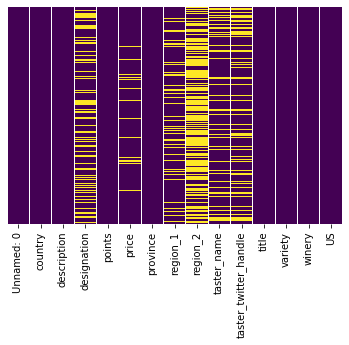

In [31]:
#Displays a heatmap showing distribution of null values
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
#Fill in null values for price

#Calculate average price
wine_scores['price'].mean()
avg_price=35.36

#create function to impute average price into 'price' column
# @staticmethod
def impute_price(cols):
    Price = cols
        
    if pd.isna(Price):
        return avg_price
    else:
        return Price
    

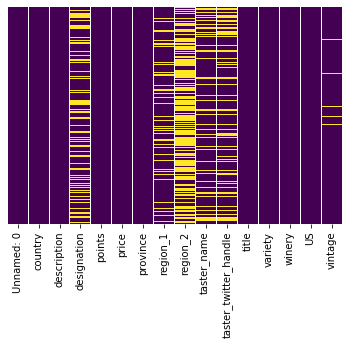

In [131]:
wine_scores['price'] = wine_scores['price'].apply(impute_price)

#display new heatmap with filled in prices
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [150]:
#Drop Columns with too much missing data
wine_scores= wine_scores.drop(['Unnamed: 0'],axis=1)

In [153]:
#Drop negative price from the first row
wine_scores.drop([0,5])



,country,description,points,price,province,title,variety,winery,US,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.00000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.00000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,2013.0
4,US,"Much like the regular bottling from 2012, this...",87,65.00000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,2012.0
6,Italy,"Here's a bright, informal red that opens with ...",87,16.00000,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,1,2013.0
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.00000,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1,2013.0
129967,US,Citation is given as much as a decade of bottl...,90,75.00000,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,0,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,90,30.00000,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,1,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.00000,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,1,2012.0


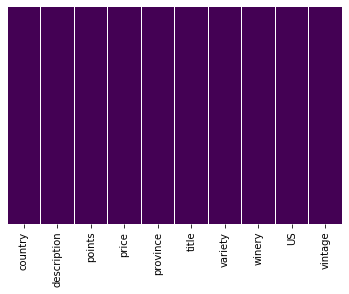

In [156]:
#Drop NA volues from vintage column
wine_scores.dropna()

#display new heatmap 
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

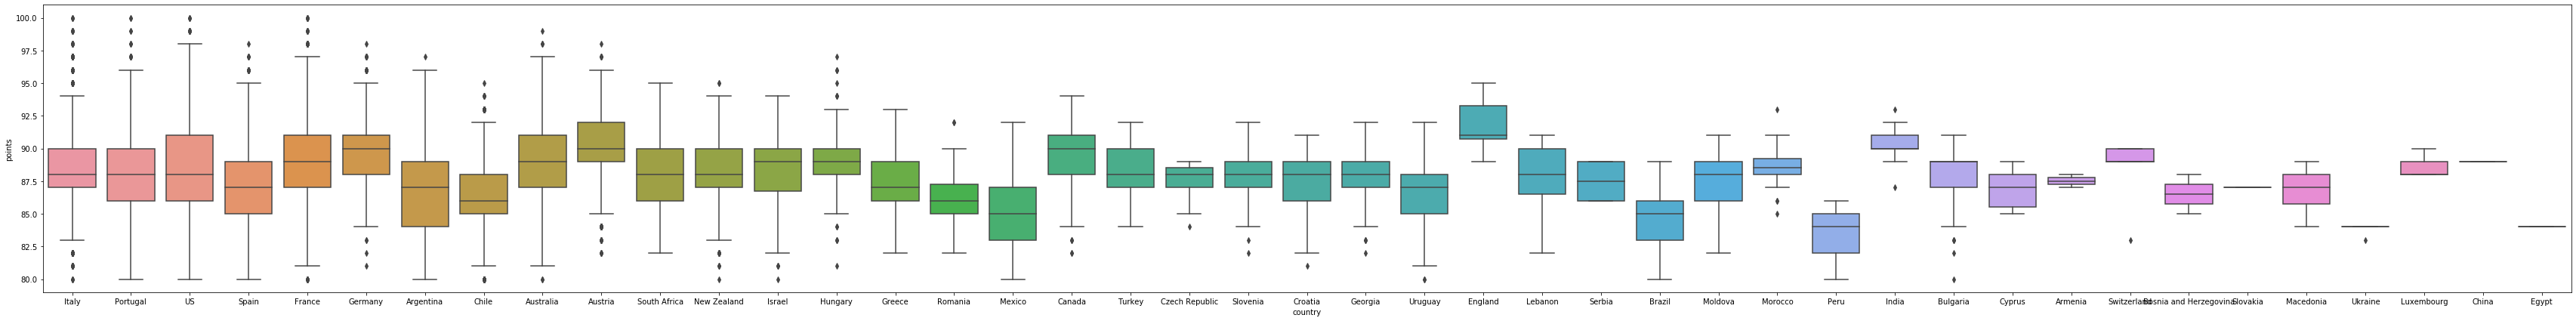

In [157]:
#display the relationship country and wine score

plt.figure(figsize=(60,7))

sns.boxplot(x='country', y='points', data=wine_scores)

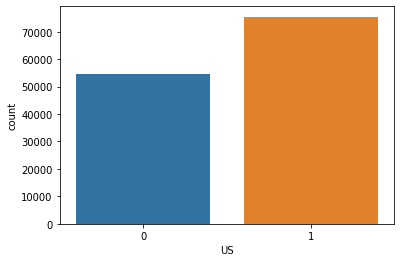

In [34]:
#Display the number of wine reviews from the US and rest of the world
sns.countplot(x='US',data=wine_scores)

,country,description,points,price,province,title,variety,winery,US,vintage
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.00000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.00000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.00000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,2013.0
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.00000,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1,2011.0
6,Italy,"Here's a bright, informal red that opens with ...",87,16.00000,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,1,2013.0
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.00000,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1,2013.0
129967,US,Citation is given as much as a decade of bottl...,90,75.00000,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,0,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,90,30.00000,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,1,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.00000,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,1,2012.0


In [169]:
# wine_scores = wine_scores.drop(['country','description','province','title','variety','winery'],axis=1)

In [167]:
wine_scores = wine_scores.drop([0,2])

In [168]:
wine_scores

,points,price,US,vintage
1,87,15.00000,1,2011.0
3,87,13.00000,0,2013.0
4,87,65.00000,0,2012.0
5,87,15.00000,1,2011.0
6,87,16.00000,1,2013.0
...,...,...,...,...
129966,90,28.00000,1,2013.0
129967,90,75.00000,0,2004.0
129968,90,30.00000,1,2013.0
129969,90,32.00000,1,2012.0


In [183]:
#Prepare data for model insertion

X = wine_scores.drop(['US'],axis=1)
y = wine_scores['US']


        points     price  vintage
1           87  15.00000   2011.0
3           87  13.00000   2013.0
4           87  65.00000   2012.0
5           87  15.00000   2011.0
6           87  16.00000   2013.0
...        ...       ...      ...
129966      90  28.00000   2013.0
129967      90  75.00000   2004.0
129968      90  30.00000   2013.0
129969      90  32.00000   2012.0
129970      90  21.00000   2012.0

[125298 rows x 3 columns]


In [173]:
#import train test split

from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [175]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [176]:
logmodel = LogisticRegression()

In [177]:
logmodel.fit(X_train,y_train)

C:\Users\jarro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
predictions = logmodel.predict(X_test)

In [179]:
#Import library to evaluate the model

from sklearn.metrics import classification_report

In [180]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59     15896
           1       0.00      0.00      0.00     21694

    accuracy                           0.42     37590
   macro avg       0.21      0.50      0.30     37590
weighted avg       0.18      0.42      0.25     37590



C:\Users\jarro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [181]:
from sklearn.metrics import confusion_matrix

In [182]:
confusion_matrix(y_test, predictions)

array([[15896,     0],
       [21694,     0]], dtype=int64)